<a href="https://colab.research.google.com/github/filzahannisa/UK-Retail-Commercial-Analysis/blob/main/FILZAH_ANNISA_Final_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#instruction/information

In [ ]:
#Data Cleaning
#Data Explorations
#Data Visualization
#Mathematical Modelling
#Model evaluation
#Business usecase implementation / suggestion (conclusion)



1. Terdapat penjelasan atau overview yang akan dikerjakan dalam final project, termasuk expected outputnya:
with this data, i want to do the following:
- i will use this data to create a customer segmentation based off revenue in total of 2010-2011, transaction number/frequency, etc.
- find out the top sellings products of this store
- find out affinity analysis, to see if we can combine/ cross-sell some products. in the future, when a customer buy A, they will get a recommendation of B.
- project the sales in the future //if cross-selling is applied to them.
2. dataset: #dataset: https://www.kaggle.com/datasets/atharvaarya25/e-commerce-analysis-uk?select=data.csv data of retail from 2010-2011.
3. do preprocessing data

possibility of modelling/techniques I MAY use to answer my questions above:
1. Top Selling Products:
* Descriptive Statistics
*Data Visualization

2. Customer Segmentation:
* RFM

3. Affinity Analysis and Recommender Systems:
* sUPRISE



In [ ]:
#InvoiceNo: Invoice number. Nominal, a 6-digit integral number uniquely assigned to each transaction. If this code starts with letter 'c', it indicates a cancellation.
#StockCode: Product (item) code. Nominal, a 5-digit integral number uniquely assigned to each distinct product.
#Description: Product (item) name. Nominal.
#Quantity: The quantities of each product (item) per transaction. Numeric.
#InvoiceDate: Invice Date and time. Numeric, the day and time when each transaction was generated.
#UnitPrice: Unit price. Numeric, Product price per unit in sterling.
#CustomerID: Customer number. Nominal, a 5-digit integral number uniquely assigned to each customer.
#Country: Country name. Nominal, the name of the country where each customer resides.

In [ ]:
#title of project: Retailer Data Analysis: Uncovering Revenue Patterns and Customer Behavior

In [ ]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import classification_report, confusion_matrix

sns.set(rc={'figure.figsize':(20.7,8.27)})
sns.set_style("whitegrid")
sns.color_palette("dark")
plt.style.use("fivethirtyeight")
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.feature_selection import VarianceThreshold
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from statsmodels.tools.tools import add_constant
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from sklearn.cluster import KMeans


#data load

In [ ]:
file_path = '/content/drive/MyDrive/DS21/FILZAH_FINALPROJECT/Ecommerce_analysis.csv'

encodings_to_try = ['utf-8', 'latin1', 'iso-8859-1', 'cp1252']

for encoding in encodings_to_try:
    try:
        df = pd.read_csv(file_path, encoding=encoding)
        break  # If successful, exit the loop
    except UnicodeDecodeError:
        continue  # If an error occurs, try the next encoding


In [ ]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


#data preprocessing

In [ ]:
df.duplicated().sum()

5268

In [ ]:
df.drop_duplicates(inplace=True)


In [ ]:
missing_values = df.isna().sum()
missing_values
missing_percentage = (df.isna().mean() * 100).round(2)
missing_percentage

InvoiceNo       0.00
StockCode       0.00
Description     0.27
Quantity        0.00
InvoiceDate     0.00
UnitPrice       0.00
CustomerID     25.16
Country         0.00
dtype: float64

In [ ]:
data= df.copy()

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 536641 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    536641 non-null  object 
 1   StockCode    536641 non-null  object 
 2   Description  535187 non-null  object 
 3   Quantity     536641 non-null  int64  
 4   InvoiceDate  536641 non-null  object 
 5   UnitPrice    536641 non-null  float64
 6   CustomerID   401604 non-null  float64
 7   Country      536641 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 36.8+ MB


In [ ]:
missing_values2 = data.isna().sum()
missing_values2

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135037
Country             0
dtype: int64

In [ ]:
stock_code_to_description = data.dropna(subset=['Description']).groupby('StockCode')['Description'].first().to_dict()

# Impute the ones with known description connected to stockcode

data['Description'] = data.apply(lambda row: stock_code_to_description.get(row['StockCode'], row['Description']), axis=1)

In [ ]:
data['Description'].fillna('Unknown', inplace=True)
# this is for those with no connection to other stockcode

In [ ]:
# Count rows with Description equal to "Unknown"
unknown_description_count = (data['Description'] == 'Unknown').sum()

print(f"Count of Rows with Description 'Unknown': {unknown_description_count}")

Count of Rows with Description 'Unknown': 112


In [ ]:
# Check if  Customer ID equal to 44444 exist or not
customer_id_444_exists = (data['CustomerID'] == 44444).any()

if customer_id_444_exists:
    print("1.")
else:
    print("0")

# Impute Customer IDs with 44444
data['CustomerID'].fillna(44444, inplace=True)


0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 536641 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    536641 non-null  object 
 1   StockCode    536641 non-null  object 
 2   Description  536641 non-null  object 
 3   Quantity     536641 non-null  int64  
 4   InvoiceDate  536641 non-null  object 
 5   UnitPrice    536641 non-null  float64
 6   CustomerID   536641 non-null  float64
 7   Country      536641 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 36.8+ MB


In [ ]:
data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'])
data['InvoiceMonth'] = data['InvoiceDate'].dt.month
data['InvoiceYear'] = data['InvoiceDate'].dt.year
data['InvoiceDayOfWeek'] = data['InvoiceDate'].dt.dayofweek


In [ ]:
data['TotalProductRevenue'] = data['Quantity'] * data['UnitPrice']


In [ ]:
#doing one hot encoding
#data = pd.get_dummies(data, columns=['Country'], prefix='Country')

In [ ]:
data.head(3)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceMonth,InvoiceYear,InvoiceDayOfWeek,TotalProductRevenue
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,12,2010,2,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,12,2010,2,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,12,2010,2,22.00


#UNDERSTANDING OUTLIER

In [ ]:
negative_unit_price = data[data['UnitPrice'] < 0]

negative_unit_price

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceMonth,InvoiceYear,InvoiceDayOfWeek,TotalProductRevenue
299983,A563186,B,Adjust bad debt,1,2011-08-12 14:51:00,-11062.06,44444.0,United Kingdom,8,2011,4,-11062.06
299984,A563187,B,Adjust bad debt,1,2011-08-12 14:52:00,-11062.06,44444.0,United Kingdom,8,2011,4,-11062.06


In [ ]:
data.loc[data['StockCode'] == 'B']

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceMonth,InvoiceYear,InvoiceDayOfWeek,TotalProductRevenue
299982,A563185,B,Adjust bad debt,1,2011-08-12 14:50:00,11062.06,44444.0,United Kingdom,8,2011,4,11062.06
299983,A563186,B,Adjust bad debt,1,2011-08-12 14:51:00,-11062.06,44444.0,United Kingdom,8,2011,4,-11062.06
299984,A563187,B,Adjust bad debt,1,2011-08-12 14:52:00,-11062.06,44444.0,United Kingdom,8,2011,4,-11062.06


In [ ]:
#based of this explanation, invoice A563185,A563186 and A563187 could be connected. the negative (-) unitprice could be connected to bad debt, and the positive is adjust bad debt.
#since this is an outlier, which does not seems to be relevant in our searching. i will delete this data with bad debt

In [ ]:
data = data.loc[data['StockCode'] != 'B']

In [ ]:
negative_quantity = data[data['Quantity'] < 0]
negative_quantity

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceMonth,InvoiceYear,InvoiceDayOfWeek,TotalProductRevenue
141,C536379,D,Discount,-1,2010-12-01 09:41:00,27.50,14527.0,United Kingdom,12,2010,2,-27.50
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.65,15311.0,United Kingdom,12,2010,2,-4.65
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.65,17548.0,United Kingdom,12,2010,2,-19.80
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom,12,2010,2,-6.96
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom,12,2010,2,-6.96
...,...,...,...,...,...,...,...,...,...,...,...,...
540449,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,2011-12-09 09:57:00,0.83,14397.0,United Kingdom,12,2011,4,-9.13
541541,C581499,M,Manual,-1,2011-12-09 10:28:00,224.69,15498.0,United Kingdom,12,2011,4,-224.69
541715,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,2011-12-09 11:57:00,10.95,15311.0,United Kingdom,12,2011,4,-54.75
541716,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,2011-12-09 11:58:00,1.25,17315.0,United Kingdom,12,2011,4,-1.25


In [ ]:
data.loc[data['CustomerID'].isin([14112.0]) & (data['Description'] == "FUNKY DIVA PEN") ].sort_values(by='InvoiceDate')
#understanding WHY it is negative quantity

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceMonth,InvoiceYear,InvoiceDayOfWeek,TotalProductRevenue
114768,546084,22741,FUNKY DIVA PEN,48,2011-03-09 11:28:00,0.85,14112.0,United Kingdom,3,2011,2,40.8
123590,C546901,22741,FUNKY DIVA PEN,-2,2011-03-17 18:29:00,0.85,14112.0,United Kingdom,3,2011,3,-1.7


In [ ]:
# Quantity <0= could be discounts or returned products. this could be relevant in calculating total of our sales (including returns and discounts since theyre expenses).
# thus, im not deleting this.

<Axes: xlabel='Quantity', ylabel='TotalProductRevenue'>

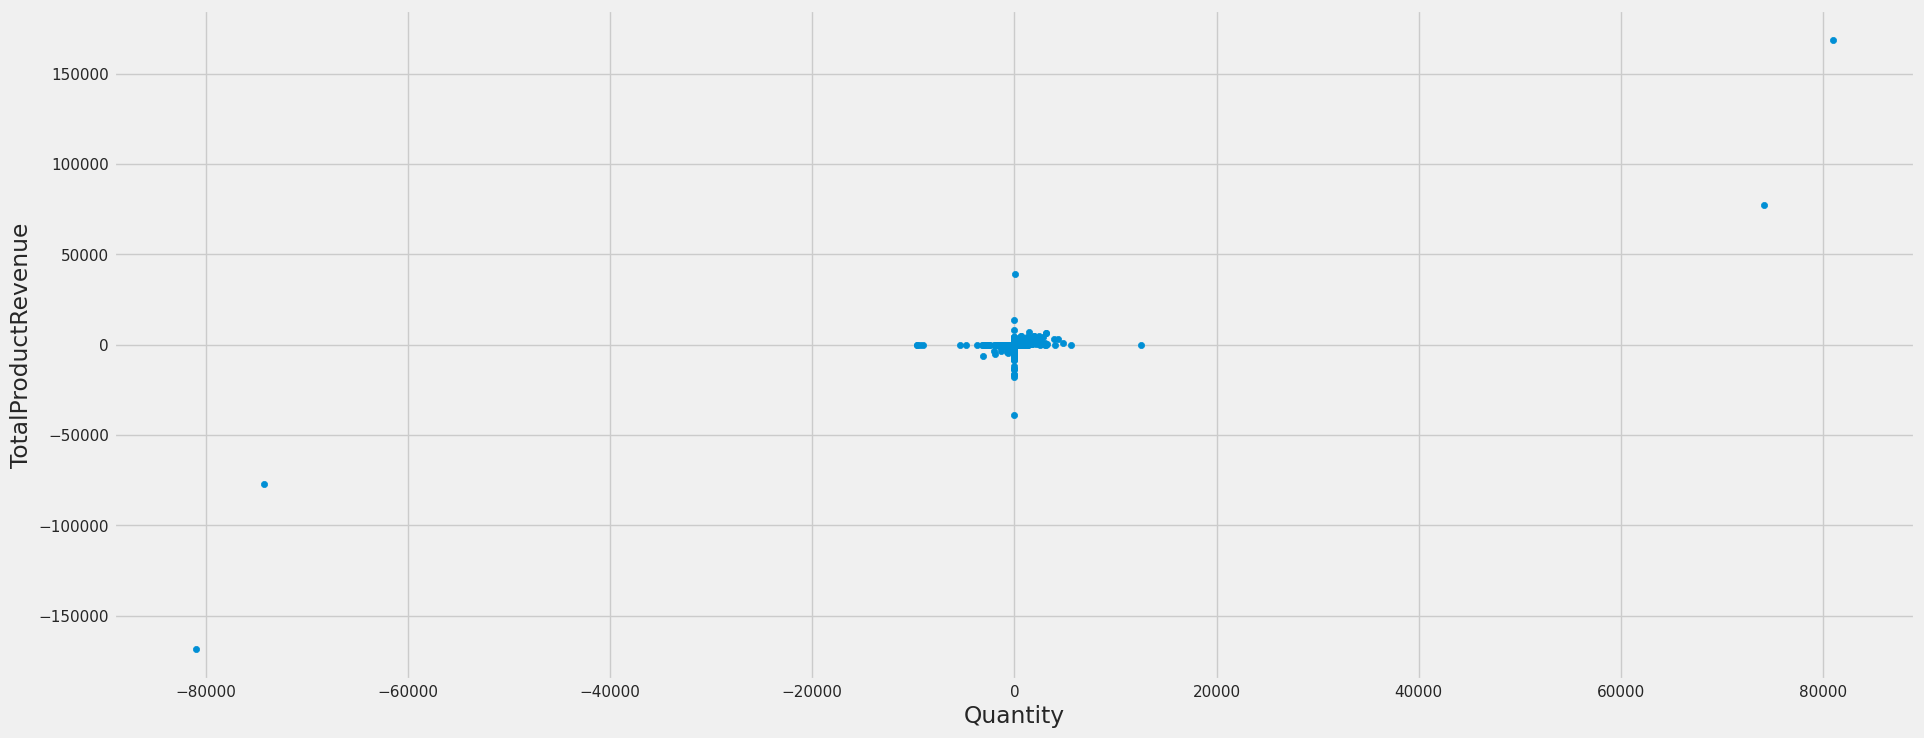

In [ ]:
data.plot(kind='scatter', x='Quantity', y='TotalProductRevenue')

In [ ]:
# i wanna see the obvious outlier
data[(data['TotalProductRevenue'] < -5000) & (data['Quantity'] < -6000)]



,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceMonth,InvoiceYear,InvoiceDayOfWeek,TotalProductRevenue
61624,C541433,23166,MEDIUM CERAMIC TOP STORAGE JAR,-74215,2011-01-18 10:17:00,1.04,12346.0,United Kingdom,1,2011,1,-77183.6
540422,C581484,23843,"PAPER CRAFT , LITTLE BIRDIE",-80995,2011-12-09 09:27:00,2.08,16446.0,United Kingdom,12,2011,4,-168469.6


In [ ]:
data[(data['TotalProductRevenue'] > 5000) & (data['Quantity'] > 6000)]


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceMonth,InvoiceYear,InvoiceDayOfWeek,TotalProductRevenue
61619,541431,23166,MEDIUM CERAMIC TOP STORAGE JAR,74215,2011-01-18 10:01:00,1.04,12346.0,United Kingdom,1,2011,1,77183.6
540421,581483,23843,"PAPER CRAFT , LITTLE BIRDIE",80995,2011-12-09 09:15:00,2.08,16446.0,United Kingdom,12,2011,4,168469.6


In [ ]:
#since both products above are completely returned, i will drop both of them
data = data[(data['TotalProductRevenue'] > -5000) & (data['Quantity'] > -6000)]
data= data[(data['TotalProductRevenue']< 5000) & (data['Quantity']< 6000)]


In [ ]:
data[data['Quantity'] > 5000]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceMonth,InvoiceYear,InvoiceDayOfWeek,TotalProductRevenue
74614,542504,37413,ICON MUG REVOLUTIONARY,5568,2011-01-28 12:03:00,0.0,44444.0,United Kingdom,1,2011,4,0.0


In [ ]:
data= data[data['Quantity'] < 5000]

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 536592 entries, 0 to 541908
Data columns (total 12 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   InvoiceNo            536592 non-null  object        
 1   StockCode            536592 non-null  object        
 2   Description          536592 non-null  object        
 3   Quantity             536592 non-null  int64         
 4   InvoiceDate          536592 non-null  datetime64[ns]
 5   UnitPrice            536592 non-null  float64       
 6   CustomerID           536592 non-null  float64       
 7   Country              536592 non-null  object        
 8   InvoiceMonth         536592 non-null  int64         
 9   InvoiceYear          536592 non-null  int64         
 10  InvoiceDayOfWeek     536592 non-null  int64         
 11  TotalProductRevenue  536592 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(4), object(4)
memory usage: 53.2

#EDA Analysis

In [ ]:
# Filter the data for rows with "DISCOUNT" in the description
discount_rows = data[data['Description'].str.contains("DISCOUNT", case=False, na=False)]

discount_rows


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceMonth,InvoiceYear,InvoiceDayOfWeek,TotalProductRevenue
141,C536379,D,Discount,-1,2010-12-01 09:41:00,27.50,14527.0,United Kingdom,12,2010,2,-27.50
9038,C537164,D,Discount,-1,2010-12-05 13:21:00,29.29,14527.0,United Kingdom,12,2010,6,-29.29
14498,C537597,D,Discount,-1,2010-12-07 12:34:00,281.00,15498.0,United Kingdom,12,2010,1,-281.00
19392,C537857,D,Discount,-1,2010-12-08 16:00:00,267.12,17340.0,United Kingdom,12,2010,2,-267.12
31134,C538897,D,Discount,-1,2010-12-15 09:14:00,5.76,16422.0,United Kingdom,12,2010,2,-5.76
...,...,...,...,...,...,...,...,...,...,...,...,...
479868,C577227,D,Discount,-1,2011-11-18 12:06:00,19.82,14527.0,United Kingdom,11,2011,4,-19.82
479869,C577227,D,Discount,-1,2011-11-18 12:06:00,16.76,14527.0,United Kingdom,11,2011,4,-16.76
493613,C578239,D,Discount,-1,2011-11-23 12:29:00,26.33,14912.0,Italy,11,2011,2,-26.33
516221,C579884,D,Discount,-1,2011-11-30 17:34:00,20.53,14527.0,United Kingdom,11,2011,2,-20.53


In [ ]:
# Filter the data to exclude rows with "DISCOUNT" in the description
data = data[~data['Description'].str.contains("DISCOUNT", case=False, na=False)]


In [ ]:
# i wanna know the top returned products excluding discounts

returns_data = data[data['Quantity'] < 0]

returns_data = returns_data[~returns_data['Description'].str.contains("DISCOUNT")]

return_counts = returns_data.groupby('Description')['Quantity'].count().reset_index()

# TOP RETURNED PRODUCTS
top_returned_product = return_counts.sort_values(by='Quantity', ascending=False)
top_returned_product.head(9)



,Description,Quantity
1344,Manual,241
1737,REGENCY CAKESTAND 3 TIER,183
1623,POSTAGE,125
2223,Unknown,97
1118,JAM MAKING SET WITH JARS,87
1900,SET OF 3 CAKE TINS PANTRY DESIGN,75
2112,STRAWBERRY CERAMIC TRINKET BOX,60
1836,SAMPLES,60
1807,ROSES REGENCY TEACUP AND SAUCER,54


In [ ]:
sample_purchases['TotalProductRevenue'].sum()

-3039.6499999999996

In [ ]:
#SUMMARY

#postage are not a product, its a fee. nor manual (unsure what this is could be manual entry from customer service. so the product isnt specific)
#hence top KNOWN 5 are:
#  1 REGENCY CAKESTAND 3 TIER
#  2	JAM MAKING SET WITH JARS
#  3  SET OF 3 CAKE TINS PANTRY DESIGN
#  4  STRAWBERRY CERAMIC TRINKET BOX
#  5  ROSES REGENCY TEACUP AND SAUCER


#Meanwhile, we can also infer that samples are highly returned, so we can analyse this further to make sure its not a wasted effort.

In [ ]:
data.describe()

,Quantity,UnitPrice,CustomerID,InvoiceMonth,InvoiceYear,InvoiceDayOfWeek,TotalProductRevenue
count,536515.000000,536515.000000,536515.000000,536515.000000,536515.000000,536515.000000,536515.000000
mean,9.652377,4.093351,22619.500899,7.544827,2010.921780,2.423958,18.538023
std,44.408145,31.887830,12741.784560,3.508725,0.268517,1.839950,72.136406
min,-5368.000000,0.000000,12347.000000,1.000000,2010.000000,0.000000,-4921.500000
25%,1.000000,1.250000,14367.000000,5.000000,2011.000000,1.000000,3.750000
50%,3.000000,2.080000,16255.000000,8.000000,2011.000000,2.000000,9.870000
75%,10.000000,4.130000,44444.000000,11.000000,2011.000000,4.000000,17.400000
max,4800.000000,4575.640000,44444.000000,12.000000,2011.000000,6.000000,4992.000000


In [ ]:
import plotly.express as px

In [ ]:
numeric_columns = ['Quantity', 'UnitPrice', 'TotalProductRevenue']

In [ ]:
total_revenue_by_country = data.groupby('Country')['TotalProductRevenue'].sum()
total_revenue_by_country_sorted = total_revenue_by_country.sort_values(ascending=False).reset_index()
total_revenue_by_country_sorted

#WHICH COUNTRIES ARE THE TOP BUYERS

,Country,TotalProductRevenue
0,United Kingdom,8378059.214
1,Netherlands,284867.940
2,EIRE,263427.890
3,Germany,221509.470
4,France,205639.230
5,Australia,137009.770
6,Switzerland,56363.050
7,Spain,54756.030
8,Belgium,40910.960
9,Sweden,36585.410


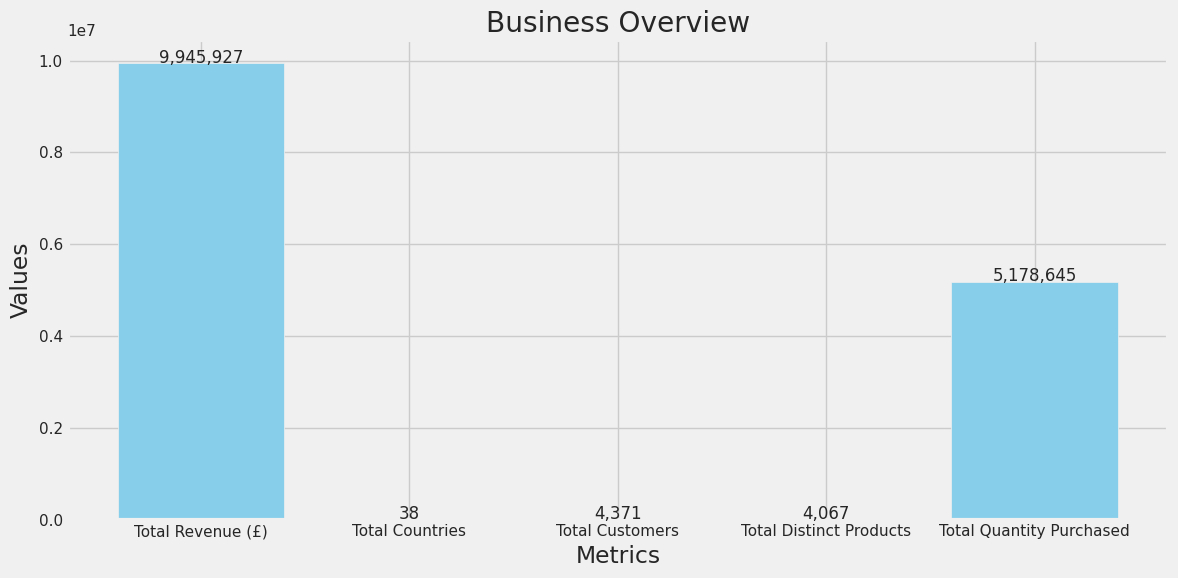

In [ ]:
import matplotlib.pyplot as plt

# Calculate the metrics
total_revenue = data['TotalProductRevenue'].sum()
total_countries = data['Country'].nunique()
total_customers = data['CustomerID'].nunique()
total_distinct_products = data['StockCode'].nunique()
total_quantity_purchased = data['Quantity'].sum()

# Create a bar chart
metrics = ['Total Revenue (£)', 'Total Countries', 'Total Customers', 'Total Distinct Products', 'Total Quantity Purchased']
values = [total_revenue, total_countries, total_customers, total_distinct_products, total_quantity_purchased]

plt.figure(figsize=(12, 6))
plt.bar(metrics, values, color='skyblue')

# Annotate the values on top of each bar
for i, value in enumerate(values):
    plt.text(i, value + 10000, f'{value:,.0f}', ha='center', fontsize=12)

# Add labels and title
plt.xlabel('Metrics')
plt.ylabel('Values')
plt.title('Business Overview')

# Show the plot
plt.tight_layout()
plt.show()


In [ ]:
total_customers

4371

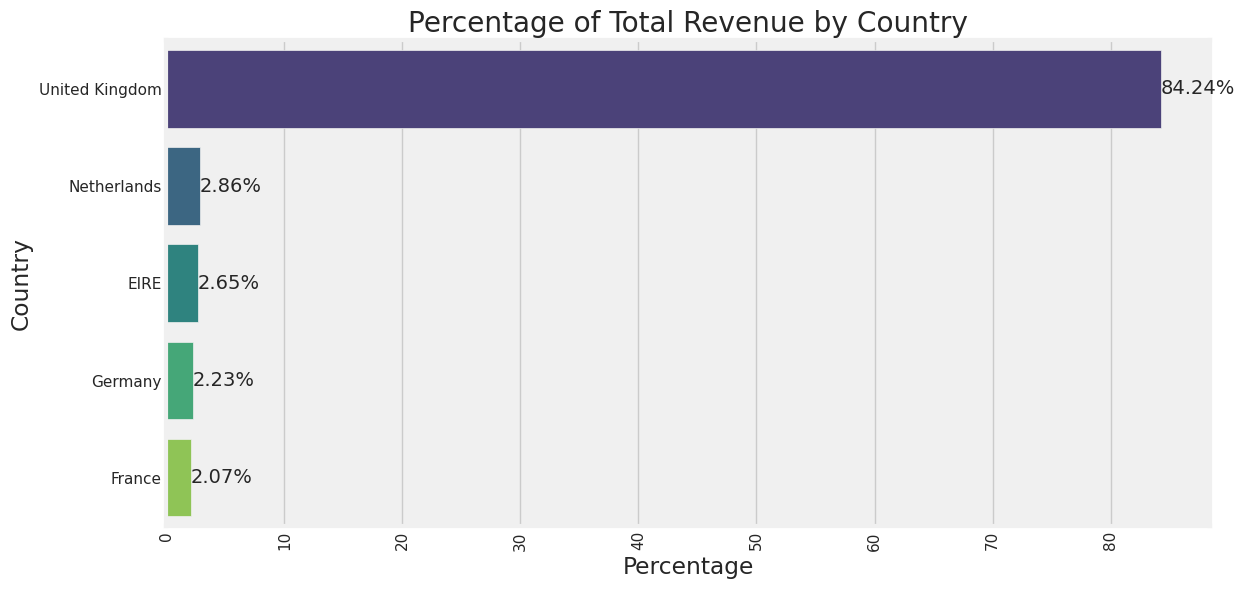

In [ ]:
# country revenue percentage
total_revenue_by_country_sorted['Percentage'] = (total_revenue_by_country_sorted['TotalProductRevenue'] / total_revenue_by_country_sorted['TotalProductRevenue'].sum()) * 100

# Plot the bar chart
plt.figure(figsize=(12, 6),facecolor='white')
sns.barplot(x='Percentage', y='Country', data=total_revenue_by_country_sorted.head(5), palette='viridis')
plt.title('Percentage of Total Revenue by Country')
plt.xlabel('Percentage')
plt.ylabel('Country')

# Annotate the percentages on the bars
for index, row in total_revenue_by_country_sorted.head(5).iterrows():
    plt.text(row['Percentage'], index, f'{row["Percentage"]:.2f}%', va='center')
plt.xticks(rotation=90)
plt.show()


In [ ]:
#distinct customer per country

distinct_customer_count_per_country = data.groupby('Country')['CustomerID'].nunique()

distinct_customer_count_per_country_sorted = distinct_customer_count_per_country.sort_values(ascending=False).reset_index()
distinct_customer_count_per_country_sorted

,Country,CustomerID
0,United Kingdom,3949
1,Germany,95
2,France,88
3,Spain,31
4,Belgium,25
5,Switzerland,22
6,Portugal,20
7,Italy,15
8,Finland,12
9,Austria,11


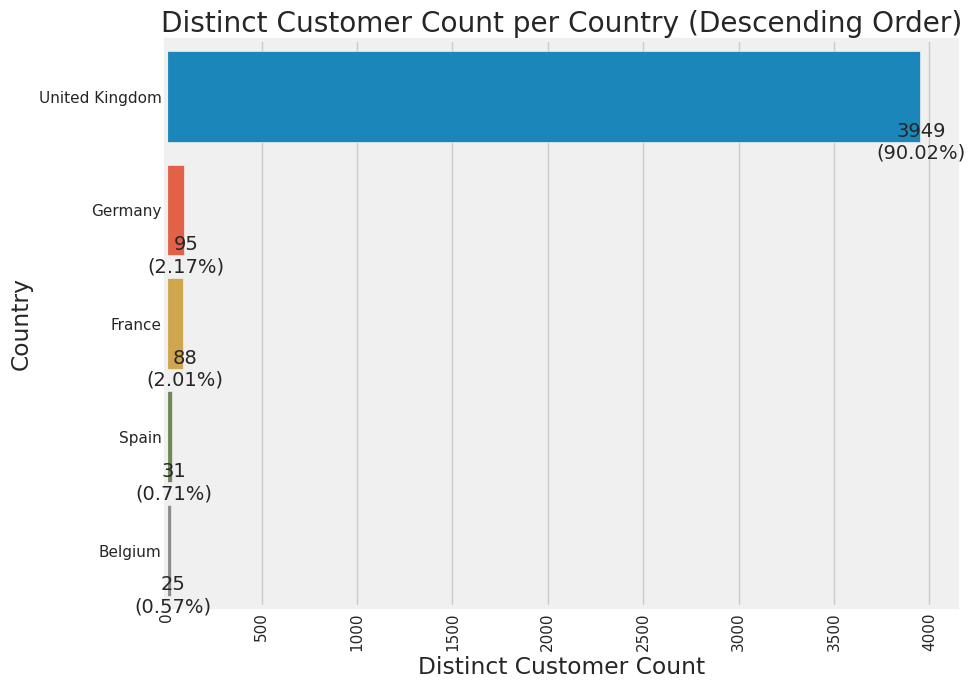

In [ ]:
# COUNTRY PERCENTAGE OF DISTINCT CUSTOMERS
#WHO HAS THE MOST CUSTOMERS
plt.figure(figsize=(20, 7),facecolor='white')
plt.subplot(1, 2, 2)
sns.barplot(x='CustomerID', y='Country', data=distinct_customer_count_per_country_sorted.head(5))
plt.title('Distinct Customer Count per Country (Descending Order)')
plt.xlabel('Distinct Customer Count')
plt.ylabel('Country')
plt.xticks(rotation=90)

# Calculate percentages
total_customers = distinct_customer_count_per_country_sorted['CustomerID'].sum()
percentages = (distinct_customer_count_per_country_sorted['CustomerID'] / total_customers) * 100

# Annotate because i want it to be CLEAR
for p, percentage, count in zip(plt.gca().patches, percentages, distinct_customer_count_per_country_sorted['CustomerID']):
    width = p.get_width()
    plt.gca().annotate(f'{int(count)}\n({percentage:.2f}%)', (width  + 10 , p.get_y() + p.get_height() / 1), ha='center', va='center')

plt.show()


In [ ]:
# Top best sellers based on frequency of purchase / country

country_seller = data.groupby(['Country', 'Description'])['Quantity'].sum().reset_index()

top_sellers_by_country = country_seller.groupby('Country').apply(lambda x: x.nlargest(1, 'Quantity')).reset_index(drop=True)


print("Top Seller by Frequency of Purchase per Country:")
top_sellers_by_country


Top Seller by Frequency of Purchase per Country:


,Country,Description,Quantity
0,Australia,MINI PAINT SET VINTAGE,2916
1,Austria,SET 12 KIDS COLOUR CHALK STICKS,288
2,Bahrain,ICE CREAM SUNDAE LIP GLOSS,96
3,Belgium,PACK OF 72 RETROSPOT CAKE CASES,480
4,Brazil,DOLLY GIRL LUNCH BOX,24
5,Canada,RETRO COFFEE MUGS ASSORTED,504
6,Channel Islands,RAIN PONCHO,407
7,Cyprus,HEART DECORATION PAINTED ZINC,384
8,Czech Republic,WOODEN STAR CHRISTMAS SCANDINAVIAN,72
9,Denmark,RED HARMONICA IN BOX,288


In [ ]:
# Top 5 revenue generators per country
top_revenue_generators_by_country = data.groupby(['Country', 'Description'])['TotalProductRevenue'].sum()
top_revenue_generators_by_country = top_revenue_generators_by_country.reset_index()
top_revenue_generators_by_country = top_revenue_generators_by_country.groupby('Country').apply(lambda x: x.nlargest(1, 'TotalProductRevenue')).reset_index(drop=True)

print("\nTop Revenue Generators by Country:")
top_revenue_generators_by_country


Top Revenue Generators by Country:


,Country,Description,TotalProductRevenue
0,Australia,RABBIT NIGHT LIGHT,3375.84
1,Austria,POSTAGE,1456.00
2,Bahrain,ICE CREAM SUNDAE LIP GLOSS,120.00
3,Belgium,POSTAGE,4248.00
4,Brazil,REGENCY CAKESTAND 3 TIER,175.20
5,Canada,POSTAGE,550.94
6,Channel Islands,REGENCY CAKESTAND 3 TIER,517.80
7,Cyprus,RUSTIC SEVENTEEN DRAWER SIDEBOARD,580.00
8,Czech Republic,ROUND SNACK BOXES SET OF4 WOODLAND,70.80
9,Denmark,RED KITCHEN SCALES,734.40


In [ ]:
# NOW I WANT TO KNOW WHICH DAY IS THE BEST DAY FOR CUSTOMERS. AND ALSO WHICH DAY HAS HIGHEST REVENUE IN GENERAL

In [ ]:

data['DayOfWeek'] = data['InvoiceDate'].dt.day_name()
day_stats = data.groupby('DayOfWeek').agg({'TotalProductRevenue': 'sum', 'InvoiceNo': 'count'}).reset_index()


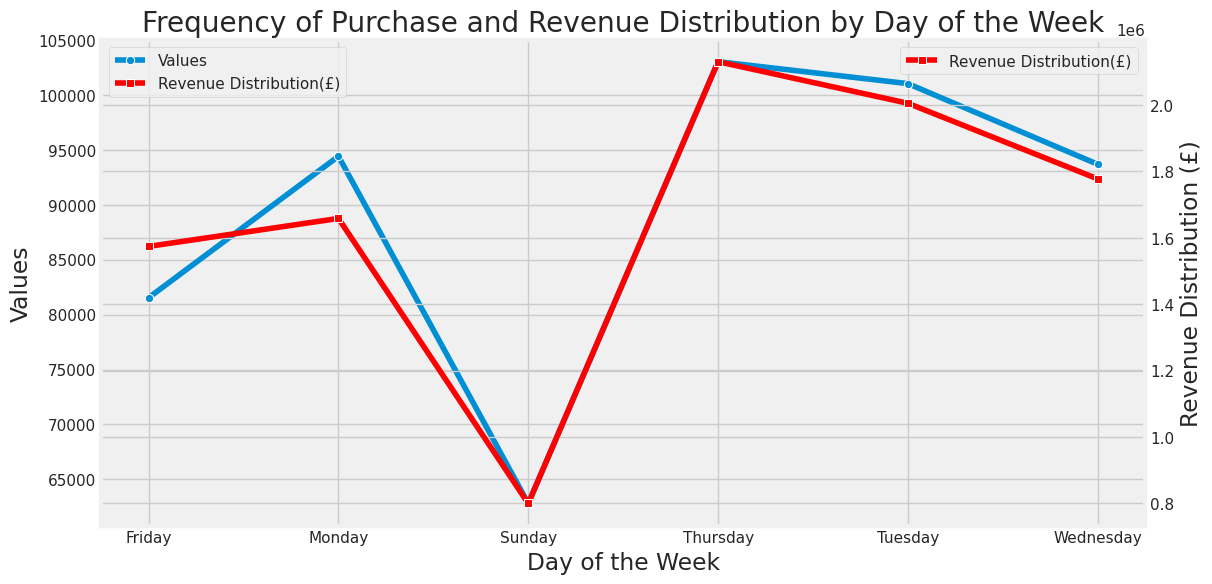

In [ ]:
# Plot the frequency of purchase by day of the week as a line graph with revenue distribution per day
plt.figure(figsize=(12, 6), facecolor='white')
ax1 = sns.lineplot(x='DayOfWeek', y='InvoiceNo', data=day_stats, sort=False, marker='o', label='Values', palette='viridis')
ax2 = ax1.twinx()  # Create a second y-axis for revenue distribution
sns.lineplot(x='DayOfWeek', y='TotalProductRevenue', data=day_stats, sort=False, marker='s', label='Revenue Distribution(£)', ax=ax2, color='red')  # Set the color to red

# Customize the plot
plt.title('Frequency of Purchase and Revenue Distribution by Day of the Week')
ax1.set_xlabel('Day of the Week')
ax1.set_ylabel('Values')
ax2.set_ylabel('Revenue Distribution (£)')  # Assuming revenue is in pounds (£)
plt.xticks(rotation=45)


# Add legend
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper left')

plt.show()


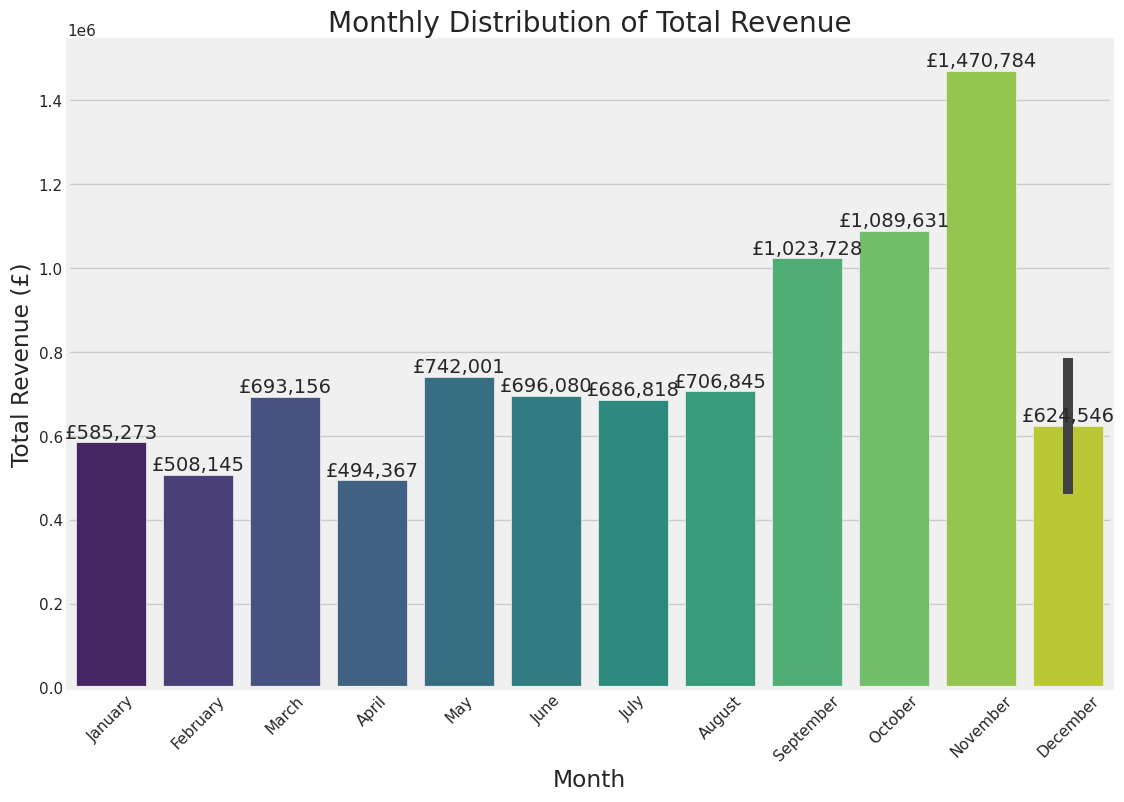

In [ ]:
monthly_revenue = data.groupby(['InvoiceYear', 'InvoiceMonth'])['TotalProductRevenue'].sum().reset_index()

month_names = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

# Map the month numbers to month names
monthly_revenue['InvoiceMonth'] = monthly_revenue['InvoiceMonth'].map({i+1: month_names[i] for i in range(12)})

# Sort the data by month order
monthly_revenue = monthly_revenue.sort_values(by='InvoiceMonth', key=lambda x: x.map({month: i for i, month in enumerate(month_names)}))
# Plot the monthly distribution of total revenue
plt.figure(figsize=(12, 8), facecolor='white')
sns.barplot(x='InvoiceMonth', y='TotalProductRevenue', data=monthly_revenue, palette='viridis')
plt.title('Monthly Distribution of Total Revenue')
plt.xlabel('Month')
plt.ylabel('Total Revenue (£)')  # Assuming revenue is in pounds (£)

# Annotate with increased distance
annotation_distance = 5  # Adjust this value as needed
for p in plt.gca().patches:
    height = p.get_height()
    if not pd.isna(height):
        plt.gca().annotate(f'£{int(height):,.0f}', (p.get_x() + p.get_width() / 2, height + annotation_distance), ha='center', va='bottom')

plt.xticks(rotation=45)

plt.show()



In [ ]:
#based off this, the frequency and revenue generated are connected. best days for customers/sales seems to be Thursday followed by Tuesday

In [ ]:
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceMonth,InvoiceYear,InvoiceDayOfWeek,TotalProductRevenue,DayOfWeek
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,12,2010,2,15.30,Wednesday
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,12,2010,2,20.34,Wednesday
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,12,2010,2,22.00,Wednesday
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,12,2010,2,20.34,Wednesday
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,12,2010,2,20.34,Wednesday


In [ ]:
# I WANNA KNOW IF THERE IS ANY CORRELATION BETWEEN RETURNS AND REVENUE BY CUSTOMERS
data['Return'] = (data['Quantity'] < 0) & ((data['StockCode'] != 'AMAZONFEE') | (data['StockCode'] != 'POST'))
returned= data[(data['Quantity'] < 0) & ((data['StockCode'] != 'AMAZONFEE') | (data['StockCode'] != 'POST'))]

# Group the data by CustomerID
customer_stats = data.groupby('CustomerID').agg({
    'TotalProductRevenue': 'sum',
    'Return': 'sum'
}).reset_index()

# correlation
correlation = customer_stats['TotalProductRevenue'].corr(customer_stats['Return'])

print(f"Correlation between Total Revenue and Returns: {correlation:.2f}")


Correlation between Total Revenue and Returns: 0.95


In [ ]:
from scipy.stats import pointbiserialr

correlation_quantity_returns, _ = pointbiserialr(data['Return'], data['Quantity'])

print(f"Correlation between Quantity and Returns: {correlation_quantity_returns:.2f}")


Correlation between Quantity and Returns: -0.12


In [ ]:
returned

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceMonth,InvoiceYear,InvoiceDayOfWeek,TotalProductRevenue,DayOfWeek,Return
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.65,15311.0,United Kingdom,12,2010,2,-4.65,Wednesday,True
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.65,17548.0,United Kingdom,12,2010,2,-19.80,Wednesday,True
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom,12,2010,2,-6.96,Wednesday,True
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom,12,2010,2,-6.96,Wednesday,True
238,C536391,21980,PACK OF 12 RED RETROSPOT TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom,12,2010,2,-6.96,Wednesday,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
540449,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,2011-12-09 09:57:00,0.83,14397.0,United Kingdom,12,2011,4,-9.13,Friday,True
541541,C581499,M,Manual,-1,2011-12-09 10:28:00,224.69,15498.0,United Kingdom,12,2011,4,-224.69,Friday,True
541715,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,2011-12-09 11:57:00,10.95,15311.0,United Kingdom,12,2011,4,-54.75,Friday,True
541716,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,2011-12-09 11:58:00,1.25,17315.0,United Kingdom,12,2011,4,-1.25,Friday,True


In [ ]:
sum_returned_products = returned['Quantity'].sum()
sum_returned_products

-285351

In [ ]:
# Filter rows where Quantity is positive and StockCode is not 'AMAZONFEE' or 'POST'
positive_quantity = data[(data['Quantity'] > 0) & ((data['StockCode'] != 'AMAZONFEE') & (data['StockCode'] != 'POST'))]

# Calculate the absolute sum of Quantity for positive_quantity
total_positive_quantity = abs(positive_quantity['Quantity'].sum())
total_positive_quantity

5457496

In [ ]:
-285351/5457496*100

-5.228606672364029

In [ ]:
# it seems that customers with more returns also generate more revenue. however, more quantity purchased doesnt necessarily mean more or less returns

In [ ]:
# Group the data by product description and sum the quantity
top_purchased_products = data.groupby('Description')['Quantity'].sum().reset_index()

# Sort the products by quantity in descending order and get the top 5
top_purchased_products = top_purchased_products.sort_values(by='Quantity', ascending=False).head(5)

# Display the top 5 most purchased products
print("Top 5 Most Purchased Products based on Quantity:")
top_purchased_products




Top 5 Most Purchased Products based on Quantity:


,Description,Quantity
3235,SMALL POPCORN HOLDER,56427
3722,WORLD WAR 2 GLIDERS ASSTD DESIGNS,53751
1727,JUMBO BAG RED RETROSPOT,47260
3808,mailout,44024
3634,WHITE HANGING HEART T-LIGHT HOLDER,39103


In [ ]:
# Calculate the total revenue for each product (Quantity * UnitPrice)
data['TotalRevenue'] = data['Quantity'] * data['UnitPrice']

# Group the data by product description and sum the total revenue
top_revenue_products = data.groupby('Description')['TotalRevenue'].sum().reset_index()

# Sort the products by total revenue in descending order and get the top 5
top_revenue_products = top_revenue_products.sort_values(by='TotalRevenue', ascending=False).head(5)

# Display the top 5 products that generate the most revenue
print("Top 5 Products that Generate the Most Sales:")
top_revenue_products


Top 5 Products that Generate the Most Sales:


,Description,TotalRevenue
1018,DOTCOM POSTAGE,206245.48
2708,REGENCY CAKESTAND 3 TIER,164459.49
3634,WHITE HANGING HEART T-LIGHT HOLDER,99790.93
2278,PARTY BUNTING,98243.88
1727,JUMBO BAG RED RETROSPOT,92175.79


# CUSTOMER SEGMENTATION USING RFM SCORES

In [ ]:
# Group the data by 'CustomerID' and calculate purchase frequency
customer_frequency = data.groupby('CustomerID')['InvoiceNo'].nunique()

# Calculate quartiles
quartiles = customer_frequency.quantile([0.25, 0.5, 0.75])

# Display quartiles
print("1st Quartile of customer purchasing frequency (25%):", quartiles[0.25])
print("2nd Quartile of customer purchasing frequency (50%):", quartiles[0.5])
print("3rd Quartile  of customer purchasing frequency(75%):", quartiles[0.75])


1st Quartile of customer purchasing frequency (25%): 1.0
2nd Quartile of customer purchasing frequency (50%): 3.0
3rd Quartile  of customer purchasing frequency(75%): 5.0


In [ ]:
# Recency
max_invoice_date = data['InvoiceDate'].max()
recency_df = data.groupby('CustomerID')['InvoiceDate'].max().reset_index()
recency_df['Recency'] = (max_invoice_date - recency_df['InvoiceDate']).dt.days

# Calculate Frequency
frequency_df = data.groupby('CustomerID')['InvoiceNo'].nunique().reset_index()
frequency_df.rename(columns={'InvoiceNo': 'Frequency'}, inplace=True)

# Define custom bins for Frequency scores
custom_bins = [0, 1, 3, 5, np.inf]
custom_labels = [4, 3, 2, 1]  # Assigning scores inversely proportional to quartiles. so 1 means BEST and 4 means lowest here

# Monetary Value
monetary_df = data.groupby('CustomerID')['TotalProductRevenue'].sum().reset_index()
monetary_df.rename(columns={'TotalProductRevenue': 'MonetaryValue'}, inplace=True)

# Merging the RFM metrics
rfm_df = pd.merge(frequency_df, monetary_df, on='CustomerID')
rfm_df = pd.merge(rfm_df, recency_df, on='CustomerID')




In [ ]:
#  quartiles for Recency
recency_quartiles = rfm_df['Recency'].quantile([0.25, 0.5, 0.75]).values
recency_quartiles

array([ 16.,  49., 142.])

In [ ]:
# Define custom bins for Recency based on quartiles
custom_bins_recency = [0] + list(recency_quartiles) + [np.inf]

# Define custom labels for Recency scores
custom_labels_recency = [1,2,3,4]  # THIS SCORES IS BASED OFF RECENCY bcs lower value means MORE RECENT




In [ ]:
# Group the data by 'CustomerID' and calculate purchase total revenue # Calculate quartiles for Monetary Value
monetary_quartiles = rfm_df['MonetaryValue'].quantile([0.25, 0.5, 0.75]).values

monetary_quartiles

array([ 292.005,  644.3  , 1610.87 ])

In [ ]:
# Define custom bins for Monetary Value
custom_bins_monetary = [0, 292.005, 644.3  , 1610.87 , np.inf]
custom_labels_monetary = [4, 3, 2, 1]  #  scores inversely proportional to quartiles




In [ ]:
# Create 'R_Score'
rfm_df['R_Score'] = pd.cut(rfm_df['Recency'], bins=custom_bins_recency, labels=custom_labels_recency, right=False)

# Create 'F_Score'
rfm_df['F_Score'] = pd.cut(rfm_df['Frequency'], bins=custom_bins, labels=custom_labels, right=False)

# Create 'M_Score' (Monetary Score)
rfm_df['M_Score'] = pd.cut(rfm_df['MonetaryValue'], bins=custom_bins_monetary, labels=custom_labels_monetary, right=False)

# make sure all RFM scores are elligible and not NaN.
#this is caused by returns / outlier that caused customers to have - monetary value.
rfm_df['M_Score'].fillna(4, inplace=True)

In [ ]:
# Calculate RFM Score
rfm_df['RFM_Score'] = rfm_df['R_Score'].astype(str) + rfm_df['F_Score'].astype(str) + rfm_df['M_Score'].astype(str)


In [ ]:
rfm_df

,CustomerID,Frequency,MonetaryValue,InvoiceDate,Recency,R_Score,F_Score,M_Score,RFM_Score
0,12347.0,7,4310.00,2011-12-07 15:52:00,1,1,1,1,111
1,12348.0,4,1797.24,2011-09-25 13:13:00,74,3,2,1,321
2,12349.0,1,1757.55,2011-11-21 09:51:00,18,2,3,1,231
3,12350.0,1,334.40,2011-02-02 16:01:00,309,4,3,3,433
4,12352.0,11,1545.41,2011-11-03 14:37:00,35,2,1,2,212
...,...,...,...,...,...,...,...,...,...
4366,18281.0,1,80.82,2011-06-12 10:53:00,180,4,3,4,434
4367,18282.0,3,176.60,2011-12-02 11:43:00,7,1,2,4,124
4368,18283.0,16,2045.53,2011-12-06 12:02:00,3,1,1,1,111
4369,18287.0,3,1837.28,2011-10-28 09:29:00,42,2,2,1,221


#RFM SCORES & CLUSTERING/SEGMENTATION

In [ ]:
# NOW lets use kmeans elobow method  to help us decide how many clusters we need to create.

In [ ]:

# Select the R-Score, F-Score, and M-Score as features
X = rfm_df[['R_Score', 'F_Score', 'M_Score']]

# Standardize using scaler!
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

#
wcss = []  # Within-Cluster-Sum-of-Squares

for k in range(2, 12):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)



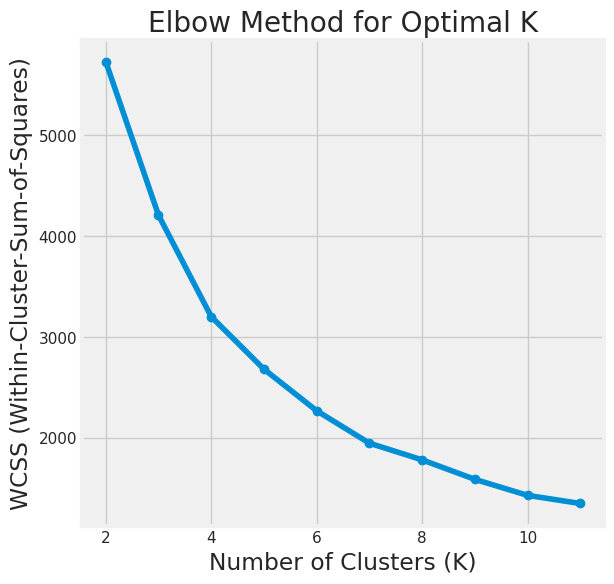

In [ ]:
# Plot the elbow curve
plt.figure(figsize=(6, 6) ,facecolor='white')
plt.plot(range(2, 12), wcss, marker='o', linestyle='-')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('WCSS (Within-Cluster-Sum-of-Squares)')
plt.grid(True)
plt.show()

In [ ]:
# OPTIMAL K= 6 FROM ELBOW CURVE
optimal_k = 6

# Apply K-Means clustering with the chosen K
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
rfm_df['Cluster'] = kmeans.fit_predict(X_scaled)


#Explore the cluster centers (average R-Score, F-Score, M-Score for each cluster)
cluster_centers = scaler.inverse_transform(kmeans.cluster_centers_)
cluster_centers_df = pd.DataFrame(cluster_centers, columns=['R_Score', 'F_Score', 'M_Score'])
cluster_centers_df


,R_Score,F_Score,M_Score
0,3.625937,2.951274,3.597451
1,2.456808,1.000000,1.443631
2,1.672932,2.953008,3.550752
3,3.371667,2.355000,2.083333
4,1.616698,2.220114,2.159393
5,1.000000,1.043165,1.244604


In [ ]:
# RFM - KMEANS ANALYSIS RESULT IN CLUSTERING

#def segment_customers:
cluster_names = {
    0: 'Lost Fishes', #low RFM
    1: 'Whales', #high M, older cust
    2: 'Need Attention Kois', #new customers, curious but not buying
    3: 'Sleeping Dolphins', #not buying anytime recent, but brings average value/money
    4: 'High Potential Nemos', #new customers, already buying
    5: 'Heroes' # HIGH RFM
}


rfm_df['Cluster_Name'] = rfm_df['Cluster'].map(cluster_names)



In [ ]:
rfm_df.head()

,CustomerID,Frequency,MonetaryValue,InvoiceDate,Recency,R_Score,F_Score,M_Score,RFM_Score,Cluster,Cluster_Name
0,12347.0,7,4310.00,2011-12-07 15:52:00,1,1,1,1,111,5,Heroes
1,12348.0,4,1797.24,2011-09-25 13:13:00,74,3,2,1,321,3,Sleeping Dolphins
2,12349.0,1,1757.55,2011-11-21 09:51:00,18,2,3,1,231,4,High Potential Nemos
3,12350.0,1,334.40,2011-02-02 16:01:00,309,4,3,3,433,0,Lost Fishes
4,12352.0,11,1545.41,2011-11-03 14:37:00,35,2,1,2,212,1,Whales


In [ ]:
# Count the number of distinct customers in each cluster
customer_counts = rfm_df['Cluster_Name'].value_counts()
customer_counts

Lost Fishes             1334
Heroes                   695
Whales                   683
Sleeping Dolphins        600
Need Attention Kois      532
High Potential Nemos     527
Name: Cluster_Name, dtype: int64

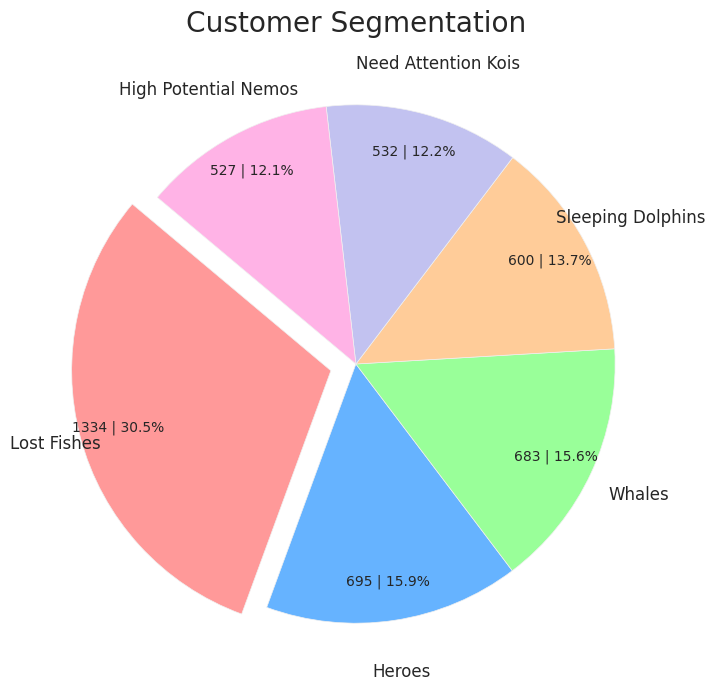

In [ ]:
# PIE CHART
colors = ['#ff9999', '#66b3ff', '#99ff99', '#ffcc99', '#c2c2f0', '#ffb3e6']

explode = (0.1, 0, 0, 0, 0, 0)

labels = [f'{count} | {percentage:.1f}%' for count, percentage in zip(customer_counts, (customer_counts / customer_counts.sum()) * 100)]

plt.figure(figsize=(8, 8), facecolor='white')
wedges, texts, autotexts = plt.pie(customer_counts, labels=None, startangle=140, colors=colors, explode=explode, autopct='', pctdistance=0.85)

for i, (name, count) in enumerate(zip(customer_counts.index, customer_counts)):
    angle = (wedges[i].theta2 - wedges[i].theta1) / 2.0 + wedges[i].theta1
    x = 1.2 * np.cos(np.deg2rad(angle))
    y = 1.2 * np.sin(np.deg2rad(angle))
    plt.annotate(f'{name}', (x, y), fontsize=12, ha='center', va='center')

for i, text in enumerate(autotexts):
    text.set_text(labels[i])
    text.set_fontsize(10)

plt.title('Customer Segmentation')

plt.show()




In [ ]:
data = data.merge(rfm_df[['CustomerID', 'Cluster_Name']], on='CustomerID', how='left')



In [ ]:
data

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceMonth,InvoiceYear,InvoiceDayOfWeek,TotalProductRevenue,DayOfWeek,Return,TotalRevenue,Cluster_Name
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,12,2010,2,15.30,Wednesday,False,15.30,Whales
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,12,2010,2,20.34,Wednesday,False,20.34,Whales
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,12,2010,2,22.00,Wednesday,False,22.00,Whales
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,12,2010,2,20.34,Wednesday,False,20.34,Whales
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,12,2010,2,20.34,Wednesday,False,20.34,Whales
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
536510,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,12,2011,4,10.20,Friday,False,10.20,High Potential Nemos
536511,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,12,2011,4,12.60,Friday,False,12.60,High Potential Nemos
536512,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,12,2011,4,16.60,Friday,False,16.60,High Potential Nemos
536513,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,12,2011,4,16.60,Friday,False,16.60,High Potential Nemos


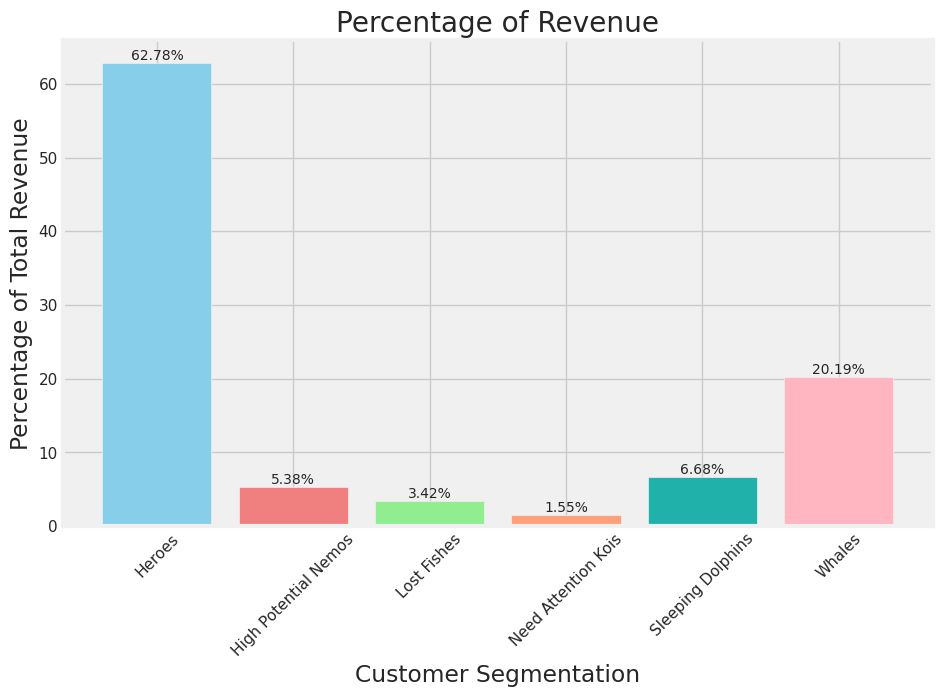

In [ ]:
cluster_revenue = data.groupby('Cluster_Name')['TotalProductRevenue'].sum().reset_index()

cluster_revenue['Percentage'] = (cluster_revenue['TotalProductRevenue'] / total_revenue) * 100
colors = ['skyblue', 'lightcoral', 'lightgreen', 'lightsalmon', 'lightseagreen', 'lightpink']


# Create a bar chart to visualize the percentage of total revenue per cluster
plt.figure(figsize=(10, 6), facecolor='white')
bars = plt.bar(cluster_revenue['Cluster_Name'], cluster_revenue['Percentage'], color=colors)
plt.xlabel('Customer Segmentation')
plt.ylabel('Percentage of Total Revenue')
plt.title('Percentage of Revenue')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

# Annotate the bars with percentage values
for bar in bars:
    height = bar.get_height()
    plt.annotate(f'{height:.2f}%', (bar.get_x() + bar.get_width() / 2, height),
                 ha='center', va='bottom', fontsize=10)

plt.show()

In [ ]:
# Filter rows where the Description is 'SAMPLES'
sample_purchases = data[data['Description'] == 'SAMPLES']
cluster_names_for_samples = sample_purchases['Cluster_Name'].unique()

cluster_names_for_samples


array(['Heroes'], dtype=object)

# RECOMMENDATION TOOLS WITH SUPRISE METHOD

In [ ]:
pip install scikit-surprise


In [ ]:
from surprise import Dataset
from surprise import Reader

In [ ]:
#first since we have no rating column, im creating a makeshift column of "Product_Rating" based off the quantity of products purchased per customers

product_quantity = data.groupby('StockCode')['Quantity'].sum().reset_index()

min_quantity = product_quantity['Quantity'].min()
max_quantity = product_quantity['Quantity'].max()

def normalize_rating(quantity, min_quantity, max_quantity):
    if max_quantity == min_quantity:
        return 1  # Avoid division by zero
    return 1 + 4 * (quantity - min_quantity) / (max_quantity - min_quantity)

product_quantity['Product_Rating'] = product_quantity['Quantity'].apply(
    lambda x: normalize_rating(x, min_quantity, max_quantity)
)

# Merge the product ratings back into the original data based on 'StockCode'
data_with_ratings = data.merge(product_quantity[['StockCode', 'Product_Rating']], on='StockCode', how='left')


In [ ]:
data_with_ratings

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceMonth,InvoiceYear,InvoiceDayOfWeek,TotalProductRevenue,DayOfWeek,Return,TotalRevenue,Cluster_Name,Product_Rating
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,12,2010,2,15.30,Wednesday,False,15.30,Whales,3.859714
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,12,2010,2,20.34,Wednesday,False,20.34,Whales,1.470782
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,12,2010,2,22.00,Wednesday,False,22.00,Whales,1.439453
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,12,2010,2,20.34,Wednesday,False,20.34,Whales,1.579529
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,12,2010,2,20.34,Wednesday,False,20.34,Whales,1.647107
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
536510,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,12,2011,4,10.20,Friday,False,10.20,High Potential Nemos,1.446379
536511,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,12,2011,4,12.60,Friday,False,12.60,High Potential Nemos,1.481139
536512,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,12,2011,4,16.60,Friday,False,16.60,High Potential Nemos,1.456412
536513,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,12,2011,4,16.60,Friday,False,16.60,High Potential Nemos,1.412525


In [ ]:
from surprise.model_selection import train_test_split
from surprise import SVD, accuracy
from surprise import NormalPredictor
from surprise import KNNBasic
from surprise.model_selection import cross_validate


In [ ]:
reader = Reader(rating_scale=(1, 5))
data_surprise = Dataset.load_from_df(data_with_ratings[['CustomerID', 'StockCode', 'Product_Rating']], reader)

trainset, testset = train_test_split(data_surprise, test_size=0.2, random_state=42)


In [ ]:
# HYPERPARAMETERS TO FINETUNE

from surprise.model_selection import GridSearchCV


In [ ]:
param_grid = {
    'n_factors': [20, 50, 100],
    'n_epochs': [5, 10, 20]
}

In [ ]:
gs = GridSearchCV(SVD, param_grid, measures=['rmse', 'mae'], cv=10)
gs.fit(data_surprise)


In [ ]:
print("Best RMSE Score: ", gs.best_score['rmse'])
print("Best Hyperparameters: ", gs.best_params['rmse'])

Best RMSE Score:  0.024334635241800264
Best Hyperparameters:  {'n_factors': 20, 'n_epochs': 20}


In [ ]:
#summary of my SVD MODEL"configured with 20 latent factors and trained for 20 epochs, achieved a good level of performance in terms of RMSE .
#This indicates that it's a suitable model for making recommendations based on customer-product interactions.

In [ ]:
best_factor = gs.best_params['rmse']['n_factors']
best_epoch = gs.best_params['rmse']['n_epochs']
svd = SVD(n_factors=best_factor, n_epochs=best_epoch)
svd.fit(trainset)


In [ ]:
def generate_recommendation(model, user_id, ratings_df, n_items):
    product_ids = ratings_df["StockCode"].unique()
    product_ids_user = ratings_df.loc[ratings_df["CustomerID"] == user_id, "StockCode"]
    product_ids_to_pred = np.setdiff1d(product_ids, product_ids_user)
    test_set = [[user_id, product_id, 4] for product_id in product_ids_to_pred]

    # Predict the ratings and generate recommendations
    predictions = model.test(test_set)
    pred_ratings = np.array([pred.est for pred in predictions])
    print("Top {0} product recommendations for user {1}:".format(n_items, user_id))

    # Rank top-n products based on the predicted ratings
    index_max = (-pred_ratings).argsort()[:n_items]
    for i in index_max:
        product_id = product_ids_to_pred[i]
        product_name = ratings_df[ratings_df["StockCode"] == product_id]["Description"].values[0]
        print(product_name)


In [ ]:
# Generate recommendations for user with 5 items recommendation (i chose this)

user_id = 17850
n_items = 5
generate_recommendation(svd, user_id, data_with_ratings, n_items)


Top 5 product recommendations for user 17850:
SMALL POPCORN HOLDER
WORLD WAR 2 GLIDERS ASSTD DESIGNS
JUMBO BAG RED RETROSPOT
ASSORTED COLOUR BIRD ORNAMENT
PACK OF 72 RETROSPOT CAKE CASES


In [ ]:
def main():
    user_id_str = input("Enter the User ID: ")
    n_items = 5
    try:
        user_id = int(float(user_id_str))  # Cast to float and then to int
        generate_recommendation(svd, user_id, data_with_ratings, n_items)
    except ValueError:
        print("Invalid User ID. Please enter a valid integer.")

if __name__ == "__main__":
    main()


Enter the User ID: 123
Top 5 product recommendations for user 123:
SMALL POPCORN HOLDER
WORLD WAR 2 GLIDERS ASSTD DESIGNS
JUMBO BAG RED RETROSPOT
WHITE HANGING HEART T-LIGHT HOLDER
ASSORTED COLOUR BIRD ORNAMENT


In [ ]:
from surprise import accuracy


In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score, average_precision_score, ndcg_score



In [ ]:
threshold = 3  # Threshold for considering an item relevant (adjust as needed)
true_labels = [1 if pred.r_ui >= threshold else 0 for pred in predictions]
predicted_labels = [1 if pred.est >= threshold else 0 for pred in predictions]
precision = precision_score(true_labels, predicted_labels)
recall = recall_score(true_labels, predicted_labels)
f1 = f1_score(true_labels, predicted_labels)
predictions = svd.test(testset)

mae = accuracy.mae(predictions)
rmse = accuracy.rmse(predictions)

print("Mean Absolute Error (MAE):", mae)
print("Root Mean Squared Error (RMSE):", rmse)

# Calculate MAP (Mean Average Precision)
average_precision = average_precision_score(true_labels, [pred.est for pred in predictions])

# Calculate NDCG (Normalized Discounted Cumulative Gain)
item_ids = [pred.iid for pred in predictions]
true_ratings = [pred.r_ui for pred in predictions]
predicted_ratings = [pred.est for pred in predictions]
ndcg = ndcg_score([true_ratings], [predicted_ratings])

# Print the evaluation metrics
print("MAE:", mae)
print("RMSE:", rmse)
print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)
print("MAP:", average_precision)
print("NDCG:", ndcg)

MAE:  0.0157
RMSE: 0.0261
Mean Absolute Error (MAE): 0.015656839543934712
Root Mean Squared Error (RMSE): 0.02605629211849689
MAE: 0.015656839543934712
RMSE: 0.02605629211849689
Precision: 1.0
Recall: 0.998652896273013
F1-Score: 0.999325994158616
MAP: 1.0
NDCG: 0.9999461508473664


In [ ]:
#Overall, the results suggest that the recommendation system is performing exceptionally well.
#High precision, recall, F1-Score, MAP, and NDCG scores indicate accurate and relevant recommendations, while low MAE and RMSE values show that the predicted ratings are very close to the true ratings.
#These metrics collectively suggest that the recommendation system is effective in providing relevant product recommendations to users.

#expected revenue if we cross-sell. using amazon research as baseline

In [ ]:
cross_selling_percentage = 0.35


average_cross_selling_revenue = cross_selling_percentage * total_revenue
average_cross_selling_revenue

3481074.5704

In [ ]:
product_recommendations_percentage = 0.10
average_recommendations_revenue = product_recommendations_percentage * total_revenue


In [ ]:
expected_total_revenue = total_revenue + average_cross_selling_revenue + average_recommendations_revenue
expected_total_revenue

14421594.6488

In [ ]:
expected_total_revenue/total_revenue

1.45